In [2]:
import pandas as pd
import numpy as np
s = pd.Series([12,-4,7,9], index=['a','b','c','d'])
print(s[:])

arr = np.array([1,2,3,4])
s2 = pd.Series(arr,index=['0번','1번','2번','3번'])
print(s2)

s3 = pd.Series(s)
print(s3)
s3[0] = 99
print(s[0]) # S3는 S의 view

arr[0]=99
print(s2[0])

a    12
b    -4
c     7
d     9
dtype: int64
0번    1
1번    2
2번    3
3번    4
dtype: int32
a    12
b    -4
c     7
d     9
dtype: int64
99
99


<h2>Series 테스트</h2>
<br>
Series객체에 이용자 정보를 저장한다(num, name, phone)<br>
위에서 생성된 객체를 이용하여 다른 Series 객체를 생성한다<br>
두번째 생성된 객체의 이름을 변경한다<br>
이들 2개의 객체의 내용을 화면에 표시한다

In [31]:
member = pd.Series([11,'smith','010-2345-5432'],index=['num','name','phone'])
print(f'member:\n{member}\n')

memCopy = pd.Series(member)
print(f'----member로 memCopy Series생성\n{memCopy}\n')
memCopy['name'] = 'Mr.Smith'
print(f'----memCopy이름 Mr.Smith로 바꿈\n{memCopy}\n')
print(f'member:\n{member}')   # 이름 바뀜
dCopy= member.copy()
dCopy['phone'] = '없음'
print(dCopy)
member['phone']

member:
num                 11
name             smith
phone    010-2345-5432
dtype: object

----member로 memCopy Series생성
num                 11
name             smith
phone    010-2345-5432
dtype: object

----memCopy이름 Mr.Smith로 바꿈
num                 11
name          Mr.Smith
phone    010-2345-5432
dtype: object

member:
num                 11
name          Mr.Smith
phone    010-2345-5432
dtype: object
num            11
name     Mr.Smith
phone          없음
dtype: object


'010-2345-5432'

<h2>Series와 NumPy Array</h2>
<br>
numpy 배열을 전달하여 Series 객체를 생성하고<br>
생성된 Series 객체를 사용하여 데이터를 변경한 후<br>
numpy 배열의 원소를 화면에 표시하여 변경여부를 확인해보세요

In [4]:
npa = np.array([1,2,3,4])
pds = pd.Series(npa)   # Shallow Copy
pds[0] = 99
print(npa)

[99  2  3  4]


<h1>Histogram</h1>

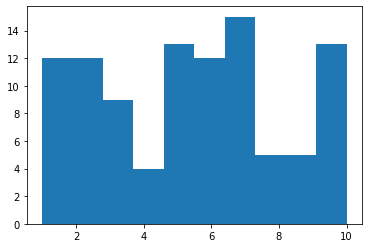

In [7]:
arr = np.random.randint(1,11,100) # 많을 수록 고른 분포를 보임
import matplotlib.pyplot as plt
plt.hist(arr,bins=10)
plt.show()

<h1>Series - 값 골라내기</h1>
<br>
Series 객체에 무작위 정수 10개를 포함하고 그 중에서 홀수만 골라서 0으로 설정

상위10개 항목
 0    59
1    53
2    92
3    16
4     5
5    51
6    19
7    53
8    45
9    54
dtype: int32
상위10개 항목
 0     0
1     0
2    92
3    16
4     0
5     0
6     0
7     0
8     0
9    54
dtype: int32


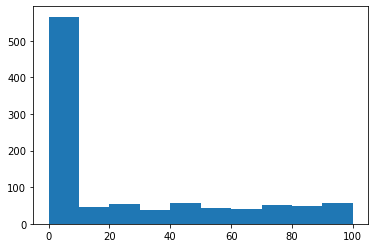

In [27]:
rand = pd.Series(np.random.randint(1,101,1000))
print('상위10개 항목\n',rand[:10])
rand[rand%2!=0] = 0
print('상위10개 항목\n',rand[:10])
plt.hist(rand)
plt.show()

In [30]:
s2 = pd.Series([5,-3,np.NaN,14])
s2.isnull()

0    False
1    False
2     True
3    False
dtype: bool

<h2>Series Boolean Indexing</h2>
<br>
무작위 정수 5개로 구성된 Series에서 짝수들을 선택하여 NaN으로 설정하고<br>
이어서 NaN으로 설정된 값들을 선택하여 0으로 변경한다

In [37]:
t = pd.Series(np.random.randint(1,101,5))
print(t)
t[t%2==1] = np.NaN
print(t)
t[t.isnull()] = 0
print(t)

0    69
1    33
2    56
3    48
4     2
dtype: int32
0     NaN
1     NaN
2    56.0
3    48.0
4     2.0
dtype: float64
0     0.0
1     0.0
2    56.0
3    48.0
4     2.0
dtype: float64


<h1>DataFrame(Pandas)</h1>

In [83]:
df = pd.DataFrame(np.arange(0,16).reshape(4,4))
df.index = ['A','B','C','D']
df.columns = ['W','X','Y','Z']
y = df['Y']
tt = df.loc[['A','B']]
tt

dict1 = {'c1':{111:11, 112:22, 114:33, 113:44},'c2':{112:32, 113:34, 114:44}}
df2 = pd.DataFrame(dict1)
df2


,c1,c2
111,11,NaN
112,22,32.0
114,33,44.0
113,44,34.0


<h1>Reindexing</h1>
<br>
W,X,Y,Z 컬럼을 가진 DataFrame에 V 컬럼을 추가하면서 reindex를 적용해보세요.<br>
인덱스는 변경하지 않고 새 컬럼이 추가될 때 옆 컬럼에서 값을 복사하는 방법을 사용해보세요.<br>
frame.reindex(None, method = 'bfill혹은 ffill', columns=['V','W','X','Y','Z'])

In [95]:
df = pd.DataFrame(np.arange(0,16).reshape(4,4))
df.columns = ['W','X','Y','Z']
df2 = pd.DataFrame()
df2.columns = ['W','X','Y','Z']
df.reindex(None, method='bfill',columns=['V','W','X','Y','Z'])
s = pd.Series(1,index=['W','X','Y','Z'])
df+df2

ValueError: DataFrame constructor not properly called!